In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

data = pd.read_excel('consumo_results.xlsx')
df = pd.DataFrame(data)
print(df['delta'].head().to_string())

0    {'cpu_percent': -7.1, 'ram_mb': 0.0, 'gpu_memo...
1    {'cpu_percent': 1.3000000000000007, 'ram_mb': ...
2    {'cpu_percent': -7.2, 'ram_mb': 0.0, 'gpu_memo...
3    {'cpu_percent': 0.09999999999999964, 'ram_mb':...
4    {'cpu_percent': -5.0, 'ram_mb': 0.0, 'gpu_memo...


# Extraer de la columna delta, la informacion de CPU, GPU y RAM

In [4]:
# Verificar si 'delta' es string y convertirlo a diccionario
if isinstance(df['delta'].iloc[0], str):
    try:
        df['delta'] = df['delta'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    except (ValueError, SyntaxError) as e:
        print(f"Error al convertir 'delta': {e}")
        # Si falla, asignar diccionarios vacíos para evitar errores
        df['delta'] = df['delta'].apply(lambda x: {} if isinstance(x, str) else x)

# Crear nuevo DataFrame con las columnas deseadas
nuevo_df = pd.DataFrame()
nuevo_df['threshold'] = df['threshold']  # Copiar la columna original
nuevo_df['device'] = df['device']  # Copiar la columna original

# Extraer 'cpu_percent' y 'ram_mb' del diccionario (manejo seguro con .get())
nuevo_df['cpu_percent'] = df['delta'].apply(lambda x: x.get('cpu_percent', 0))  # 0 si no existe
nuevo_df['ram_mb'] = df['delta'].apply(lambda x: x.get('ram_mb', 0))  # 0 si no existe

# Mostrar el resultado
print(nuevo_df.head())

   threshold device  cpu_percent    ram_mb
0        0.1    cpu         -7.1  0.000000
1        0.1    cpu          1.3  0.078125
2        0.1    cpu         -7.2  0.000000
3        0.1    cpu          0.1  0.000000
4        0.1    cpu         -5.0  0.000000


In [5]:
cpu_stats = nuevo_df.groupby('threshold')['cpu_percent'].describe()
print(cpu_stats.to_string())

            count      mean        std   min     25%  50%  75%   max
threshold                                                           
0.1        1846.0 -7.719447  12.783462 -75.0 -11.075 -5.9 -1.1  72.3
0.5        1846.0 -8.810130  14.102542 -78.0 -13.550 -6.3 -1.2  57.2
0.9        1846.0 -8.001408  12.667008 -85.2 -12.000 -6.2 -1.4  64.6


In [4]:
ram_stats = nuevo_df.groupby('threshold')['ram_mb'].describe()
print(ram_stats.to_string())

            count      mean        std         min  25%  50%  75%      max
threshold                                                                 
0.1        1846.0 -1.322175   7.064614 -144.656250  0.0  0.0  0.0  0.43750
0.5        1846.0 -1.830106  10.064321 -166.562500  0.0  0.0  0.0  0.34375
0.9        1846.0 -1.646330   9.002933 -136.515625  0.0  0.0  0.0  3.90625


In [5]:
print(nuevo_df['device'].value_counts())

device
cpu    2769
mps    2769
Name: count, dtype: int64


In [6]:
df_filtrado = nuevo_df[nuevo_df['device'] == 'cpu']
print(df_filtrado['threshold'].value_counts())

threshold
0.1    923
0.5    923
0.9    923
Name: count, dtype: int64


# CPU por threshold video

/var/folders/_q/szr0xx2x2574ld56dn__98zc0000gn/T/ipykernel_4325/2575599635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


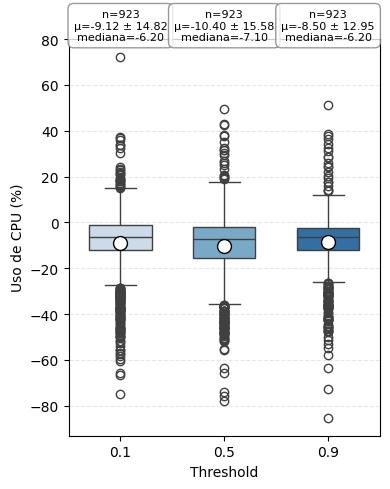

In [7]:
plt.figure(figsize=(4, 5))  # Tamaño aumentado

# Filtrar el DataFrame para solo filas con 'cpu'
df_filtrado = nuevo_df[nuevo_df['device'] == 'cpu']
cpu_stats = df_filtrado.groupby('threshold')['cpu_percent'].describe()

# Boxplot agrupado por threshold
sns.boxplot(
    data=df_filtrado,
    x='threshold',
    y='cpu_percent',
    palette='Blues',  # Paleta de colores azules
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10  # Marcador más grande
    },
    width=0.6  # Ancho de las cajas
)

# Personalización avanzada
# plt.title('Distribución del Uso de CPU por Threshold', fontsize=10, pad=0)
plt.xlabel('Threshold', fontsize=10)
plt.ylabel('Uso de CPU (%)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Usamos resources_stats para las anotaciones
for i, threshold in enumerate(cpu_stats.index):
    mean_val = cpu_stats.loc[threshold, 'mean']
    median_val = cpu_stats.loc[threshold, '50%']
    std_val = cpu_stats.loc[threshold, 'std']
    count = cpu_stats.loc[threshold, 'count']
    
    plt.text(
        i, 
        df_filtrado['cpu_percent'].max() * 1.1,  # Posición arriba del máximo
        f"n={int(count)}\nμ={mean_val:.2f} ± {std_val:.2f}\nmediana={median_val:.2f}",
        ha='center',
        fontsize=8,
        bbox=dict(
            facecolor='white',
            alpha=0.8,
            edgecolor='gray',
            boxstyle='round,pad=0.5'
        ),
    )

# Línea horizontal de referencia para CPU
# plt.axhline(
#     y=100, 
#     color='red', 
#     linestyle=':', 
#     alpha=0.5, 
#     label='Máximo teórico (CPU)'
# )
# plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Uso de RAM por threshold

/var/folders/_q/szr0xx2x2574ld56dn__98zc0000gn/T/ipykernel_4325/2536896854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


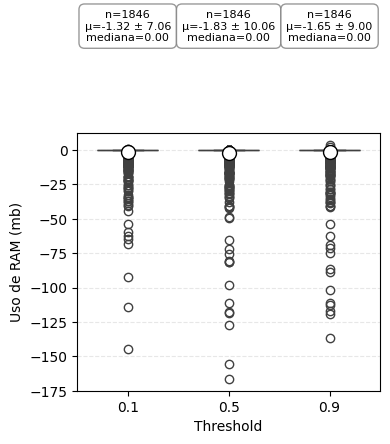

In [8]:
plt.figure(figsize=(4, 5))  # Tamaño aumentado

# Boxplot agrupado por threshold
sns.boxplot(
    data=nuevo_df,
    x='threshold',
    y='ram_mb',
    palette='Blues',  # Paleta de colores azules
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10  # Marcador más grande
    },
    width=0.6  # Ancho de las cajas
)

# Personalización avanzada
# plt.title('Distribución del Uso de RAM por Threshold', fontsize=16, pad=20)
plt.xlabel('Threshold', fontsize=10)
plt.ylabel('Uso de RAM (mb)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Usamos resources_stats para las anotaciones
for i, threshold in enumerate(ram_stats.index):
    mean_val = ram_stats.loc[threshold, 'mean']
    median_val = ram_stats.loc[threshold, '50%']
    std_val = ram_stats.loc[threshold, 'std']
    count = ram_stats.loc[threshold, 'count']
    
    plt.text(
        i, 
        nuevo_df['cpu_percent'].max() * 1.1,  # Posición arriba del máximo
        f"n={int(count)}\nμ={mean_val:.2f} ± {std_val:.2f}\nmediana={median_val:.2f}",
        ha='center',
        fontsize=8,
        bbox=dict(
            facecolor='white',
            alpha=0.8,
            edgecolor='gray',
            boxstyle='round,pad=0.5'
        )
    )

# Línea horizontal de referencia para CPU
# plt.axhline(
#     y=100, 
#     color='red', 
#     linestyle=':', 
#     alpha=0.5, 
#     label='Máximo teórico (RAM)'
# )
# plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

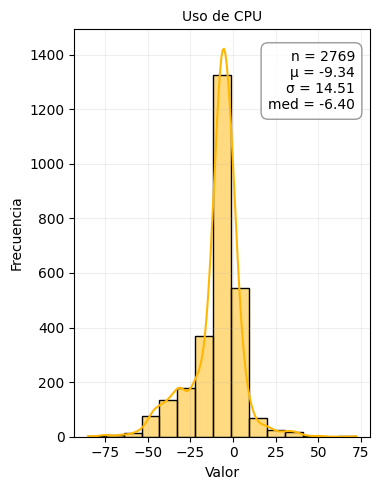

In [9]:
plt.figure(figsize=(7, 5))

df_filtrado = nuevo_df[nuevo_df['device'] == 'cpu']
cpu_stats = df_filtrado.groupby('threshold')['cpu_percent'].describe()

plt.subplot(1, 2, i)  # Cambiado a 1, 2 porque solo hay dos columnas
sns.histplot(df_filtrado['cpu_percent'], kde=True, color='#ffb703', bins=15)

# Calcular estadísticas
mean_val = df_filtrado['cpu_percent'].mean()
median_val = df_filtrado['cpu_percent'].median()
std_val = df_filtrado['cpu_percent'].std()
count = len(df_filtrado['cpu_percent'])

# Añadir texto con estadísticas
plt.text(
    x=0.95, 
    y=0.95,
    s=f"n = {int(count)}\nμ = {mean_val:.2f}\nσ = {std_val:.2f}\nmed = {median_val:.2f}",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=10,
    bbox=dict(
        facecolor='white',
        alpha=0.8,
        edgecolor='gray',
        boxstyle='round,pad=0.5'
    )
)


plt.title('Uso de CPU', loc='center', fontsize=10)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

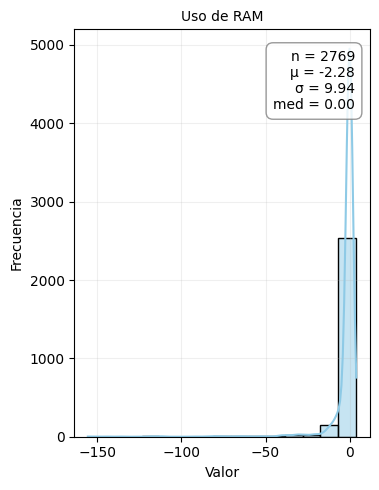

In [10]:
plt.figure(figsize=(7, 5))

df_filtrado = nuevo_df[nuevo_df['device'] == 'cpu']
cpu_stats = df_filtrado.groupby('threshold')['ram_mb'].describe()

plt.subplot(1, 2, i)  # Cambiado a 1, 2 porque solo hay dos columnas
sns.histplot(df_filtrado['ram_mb'], kde=True, color='#8ecae6', bins=15)

# Calcular estadísticas
mean_val = df_filtrado['ram_mb'].mean()
median_val = df_filtrado['ram_mb'].median()
std_val = df_filtrado['ram_mb'].std()
count = len(df_filtrado['ram_mb'])

# Añadir texto con estadísticas
plt.text(
    x=0.95, 
    y=0.95,
    s=f"n = {int(count)}\nμ = {mean_val:.2f}\nσ = {std_val:.2f}\nmed = {median_val:.2f}",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=10,
    bbox=dict(
        facecolor='white',
        alpha=0.8,
        edgecolor='gray',
        boxstyle='round,pad=0.5'
    )
)


plt.title('Uso de RAM', loc='center', fontsize=10)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

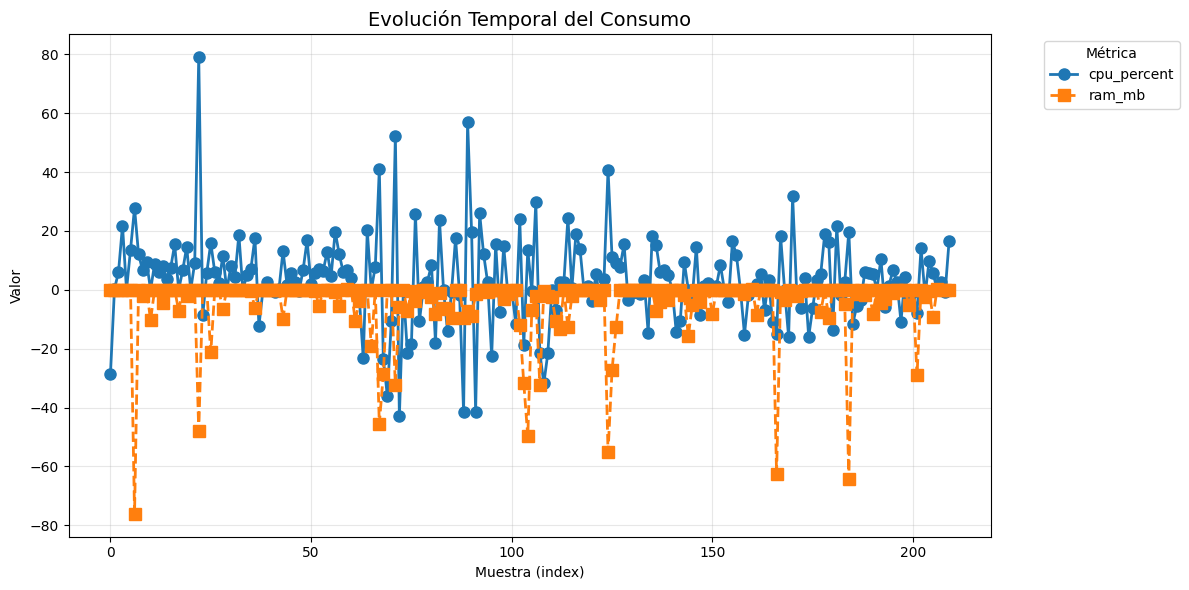

In [ ]:
plt.figure(figsize=(12, 6))
nuevo_df.reset_index().plot(x='index', y=['cpu_percent', 'ram_mb'], 
                              style=['-o', '--s', ':^'],
                              markersize=8,
                              linewidth=2,
                              figsize=(12, 6))

plt.title('Evolución Temporal del Consumo', fontsize=14)
plt.xlabel('Muestra (index)')
plt.ylabel('Valor')
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()